## This will be used to analyze the reversal data

In [7]:
import pandas as pd 

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# regular GLMs
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
%config Completer.use_jedi = False
import bambi as bmb
import arviz as az

In [8]:
output_dir = '/gpfs/gibbs/pi/levy_ifat/Or/RV_FC'

In [9]:
# get difumo's labels
labels = pd.read_csv('/gpfs/gibbs/pi/levy_ifat/Or/DiFuMo_atlas/256/labels_256_dictionary.csv')

In [10]:
tsFiles =  glob.glob((os.path.join(output_dir, 'timeSeries','sub*.npy')))
ts_total57 = [] # the 570 timeseries
ts_total55 = [] # the 555
ts_total51 = [] # the 514
sub51 = []
sub55 = []
sub57 = []
for f in tsFiles:
    ts = np.load(f)
    sub = os.path.basename(f).split('_')[0]
    if ts.shape[0] > 545:
        # z-score
        t = ts[:548]
        tz = scipy.stats.zscore(t, axis=0)
        # append
        ts_total55.append(tz)
        sub55.append(sub)

    else:
        ts_total51.append(ts[2:])
        sub51.append(sub)
            

In [11]:
# remove items and subejcts
for i in range(len(ts_total55)):
    if ts_total55[i].shape[0] < 545:
        #print(i)
        #print(ts_total55[i].shape)
        sub55.pop(i)
        ts_total55.pop(i)
        
        
print(np.array(ts_total57).shape)
print(np.array(ts_total51).shape)
print(np.array(ts_total55).shape)        

(0,)
(24,)
(89, 548, 256)


/tmp/ipykernel_20939/3254487080.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(ts_total51).shape)


In [12]:
np.array(ts_total55)[:,2:,20].shape

(89, 546)

<AxesSubplot:xlabel='variable', ylabel='value'>

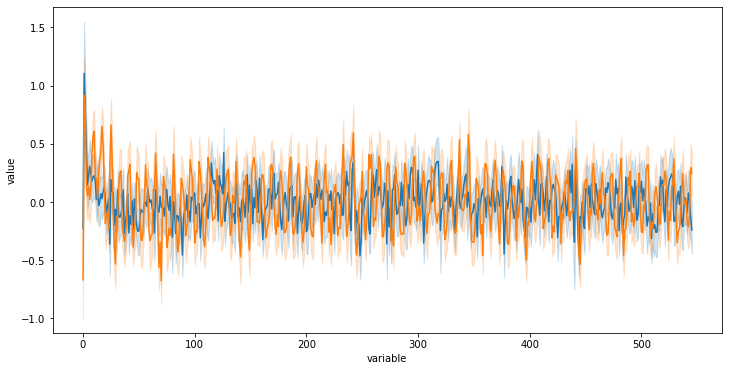

In [13]:
#%matplotlib notebook 
# this will allow us to use interactive zoom 
# plot average timeseries of amygdala and posterior-hippocampus
%matplotlib inline
d = pd.DataFrame(np.array(ts_total55)[:,2:,20]) # amygdala
e = pd.DataFrame(np.array(ts_total55)[:,2:,94]) # hippocampus
d = pd.melt(d)
e = pd.melt(e)
#%matplotlib widget
#%matplotlib notebook
plt.figure(figsize=[12,6])
sns.lineplot(x='variable',y='value', data=d)
sns.lineplot(x='variable',y='value', data=e)

In [14]:
# now lets take the actual conditions
# we have two different sets
stimList = pd.read_csv('Behavioral/StimList.csv')
np.array(stimList.Time)/2

array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
        88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
       176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
       264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
       352., 360., 368., 376., 384., 392., 400., 408., 416., 424., 432.,
       440., 448., 456., 464., 472., 480., 488., 496., 504., 512., 520.,
       528., 536., 544.])

In [15]:
stimList

,Trial,A,B,Time
0,1,CSplusUS1,CSplusUS1,0
1,2,CSminus1,CSplus1,16
2,3,CSplus1,CSminus1,32
3,4,CSplusUS1,CSplusUS1,48
4,5,CSminus1,CSminus1,64
...,...,...,...,...
64,65,CSminus2,CSplus2,1024
65,66,CSplus2,CSminus2,1040
66,67,CSminus2,CSminus2,1056
67,68,CSplus2,CSplus2,1072


In [16]:
dfGroups = pd.read_csv('Behavioral/SubGroupLists.csv', dtype={'Sub': 'string'})
dfGroups = dfGroups[['Sub','group', 'Eprime']]
for i in dfGroups.iterrows():
    dfGroups.at[i[0], 'Sub'] = "sub-" + str(i[1].Sub)


In [17]:
# lets take just the subjects in the B list and see something how the timeline looks in different conditions
dfA = dfGroups[(dfGroups.Eprime=="A")]
dfB = dfGroups[(dfGroups.Eprime=="B")]

In [18]:
# find the subjects that matched both A list and 55 list
bothList = set(dfA.Sub).intersection(sub55)
len(bothList) # 49 subjects
# extract their time series for amygdala and hippocampus
a_array = []
sub_a = []
for i, sub in enumerate(sub55):
    if sub in bothList: # check if subject is in the list
       # print(sub)
        a_array.append(ts_total55[i])
        sub_a.append(sub)
    else:
        print(f'sub {sub} was not found in bothList')

sub sub-177 was not found in bothList
sub sub-143 was not found in bothList
sub sub-094 was not found in bothList
sub sub-011 was not found in bothList
sub sub-178 was not found in bothList
sub sub-1232 was not found in bothList
sub sub-169 was not found in bothList
sub sub-188 was not found in bothList
sub sub-190 was not found in bothList
sub sub-154 was not found in bothList
sub sub-103 was not found in bothList
sub sub-089 was not found in bothList
sub sub-135 was not found in bothList
sub sub-202 was not found in bothList
sub sub-161 was not found in bothList
sub sub-172 was not found in bothList
sub sub-196 was not found in bothList
sub sub-140 was not found in bothList
sub sub-184 was not found in bothList
sub sub-170 was not found in bothList
sub sub-025 was not found in bothList
sub sub-152 was not found in bothList
sub sub-158 was not found in bothList
sub sub-186 was not found in bothList
sub sub-137 was not found in bothList
sub sub-165 was not found in bothList
sub sub-100

In [19]:
bothListB = set(dfB.Sub).intersection(sub55)
len(bothListB) # 49 subjects
# extract their time series for amygdala and hippocampus
a_arrayB = []
sub_a_B = []
for i, sub in enumerate(sub55):
    if sub in bothListB: # check if subject is in the list
       # print(sub)
        a_arrayB.append(ts_total55[i])
        sub_a_B.append(sub)
    else:
        print(f'sub {sub} was not found in bothList')

sub sub-143 was not found in bothList
sub sub-094 was not found in bothList
sub sub-011 was not found in bothList
sub sub-167 was not found in bothList
sub sub-038 was not found in bothList
sub sub-071 was not found in bothList
sub sub-063 was not found in bothList
sub sub-168 was not found in bothList
sub sub-085 was not found in bothList
sub sub-073 was not found in bothList
sub sub-188 was not found in bothList
sub sub-179 was not found in bothList
sub sub-194 was not found in bothList
sub sub-083 was not found in bothList
sub sub-089 was not found in bothList
sub sub-135 was not found in bothList
sub sub-150 was not found in bothList
sub sub-010 was not found in bothList
sub sub-082 was not found in bothList
sub sub-053 was not found in bothList
sub sub-016 was not found in bothList
sub sub-048 was not found in bothList
sub sub-173 was not found in bothList
sub sub-032 was not found in bothList
sub sub-059 was not found in bothList
sub sub-043 was not found in bothList
sub sub-185 

In [17]:
#len(a_arrayB) # 25
# build lists that will hold subjects, trialNo, condition and coupling
length = 8
roi1 = 20
roi2 = 94
subjects = []
trialNo = []
condition = []
coupling = []
amg = [] # capture average amygdala activation
a_all = [] # grab all timeseries
b_all = []
for sub,v in enumerate(a_array):
        #print(sub)
        #print(v.shape)
        dist = []
        # plus US
        for i in stimList.iterrows():
            onset = int(i[1].Time /2)
            #print(onset)
            con = i[1].A
            #print(con)
            subj = sub_a[sub]
            #print(subj)
            trial = i[1].Trial

            #i = int(i)
            a = np.array(v)[onset:onset+length,roi1] 
            b = np.array(v)[onset:onset+length,roi2] 
            coupling.append(scipy.stats.spearmanr(a,b)[0])
            subjects.append(subj)
            condition.append(con)
            trialNo.append(trial)
            a_all.append(a)
            b_all.append(b)
            amg.append(np.mean(a))
        #distUS_b.append(dist)

In [18]:
dfCoupl = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
'condition': condition, 'coupling': coupling, 'amg': amg})

dfCoupl_first = dfCoupl#[dfCoupl.trialNo<=30] # take just first half
dfCoupl_first

,subject,trialNo,condition,coupling,amg
0,sub-167,1,CSplusUS1,0.761905,-0.665134
1,sub-167,2,CSminus1,-0.238095,-0.060757
2,sub-167,3,CSplus1,0.095238,0.984678
3,sub-167,4,CSplusUS1,0.523810,0.488085
4,sub-167,5,CSminus1,-0.428571,0.053875
...,...,...,...,...,...
3376,sub-055,65,CSminus2,0.500000,0.405472
3377,sub-055,66,CSplus2,0.238095,-0.140839
3378,sub-055,67,CSminus2,0.761905,-0.051440
3379,sub-055,68,CSplus2,0.523810,-0.163185


In [19]:
# add second stimuli order (B)
subjects = []
trialNo = []
condition = []
coupling = []
amg = []
for sub,v in enumerate(a_arrayB):
        #print(sub)
        #print(v.shape)
        dist = []
        # plus US
        for i in stimList.iterrows():
            onset = int(i[1].Time /2)
            #print(onset)
            con = i[1].B
            #print(con)
            subj = sub_a_B[sub]
            #print(subj)
            trial = i[1].Trial

            #i = int(i)
            a = np.array(v)[onset:onset+length,roi1] 
            b = np.array(v)[onset:onset+length,roi2] 
            coupling.append(scipy.stats.spearmanr(a,b)[0])
            subjects.append(subj)
            condition.append(con)
            trialNo.append(trial)
            amg.append(np.mean(a))
        #distUS_b.append(dist)

In [20]:
dfCouplB = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
'condition': condition, 'coupling': coupling, 'amg':amg})

dfCouplB_first = dfCouplB#[dfCouplB.trialNo<=30] # take just first half
#dfCouplB_first

# combine both
dfBoth = pd.concat([dfCoupl_first, dfCouplB_first]).reset_index()
dfBoth.to_csv('amg_hipp_fc_allTrials.csv', index=False)

In [21]:
# descriptives
dfBoth = dfBoth.merge(dfGroups, left_on='subject',right_on='Sub')
#dfBoth
dfBoth[dfBoth.trialNo==1].groupby('group').describe()

index                                                                  \
      count         mean          std   min    25%     50%      75%     max   
group                                                                         
HC     21.0  1179.571429   837.406686   0.0  621.0   966.0  1587.00  3243.0   
VCC    28.0  1414.500000  1018.859330  69.0  724.5  1173.0  2225.25  3312.0   
VPTSD  25.0  1498.680000   933.525206   0.0  552.0  1449.0  2346.00  3105.0   

      trialNo       ...  coupling             amg                      \
        count mean  ...       75%       max count      mean       std   
group               ...                                                 
HC       21.0  1.0  ...  0.595238  0.880952  21.0  0.485107  0.793698   
VCC      28.0  1.0  ...  0.719449  0.976190  28.0  0.299758  0.621791   
VPTSD    25.0  1.0  ...  0.452381  0.976190  25.0  0.248910  0.631847   

                                                         
            min       25%       50%       75%       max  
group                                                    
HC    -0.665134  0.011983  0.386670  0.712247  2.190369  
VCC   -0.922499 -0.159265  0.316977  0.683874  1.604924  
VPTSD -0.561972 -0.116851  0.082874  0.442022  2.528585  

[3 rows x 32 columns]

In [22]:
glm = smf.mixedlm('coupling ~ C(condition) + trialNo+ amg', data=dfBoth, 
    groups = 'subject', 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1496    
Min. group size:       69          Log-Likelihood:         -2522.3218
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.020    0.026  0.754 0.451 -0.032  0.071
C(condition)[T.CSminus2]   -0.027    0.026 -1.039 0.299 -0.077  0.024
C(condition)[T.CSminusUS2]  0.057    0.027  2.120 0.034  0.004  0.109
C(condition)[T.CSplus1]    -0.011    0.018 -0.602 0.547 -0.047  0.025
C(condition)[T.CSplus2]    -0.026   

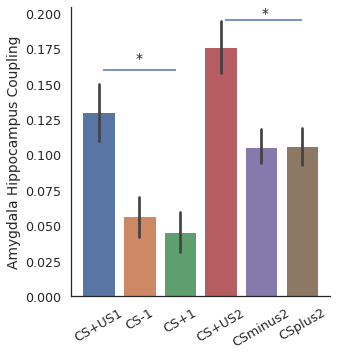

In [23]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='coupling',x='condition', data=dfBoth, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)
plt.text(0.9, 0.165, "*")
plt.hlines(0.16, 0.1,1.9)
plt.text(4, 0.197, "*")
plt.hlines(0.195, 3.1,5)
g.set_ylabels("Amygdala Hippocampus Coupling")
g.savefig('coupling_different_Conditions.png', dpi=300, bbox_inches='tight')

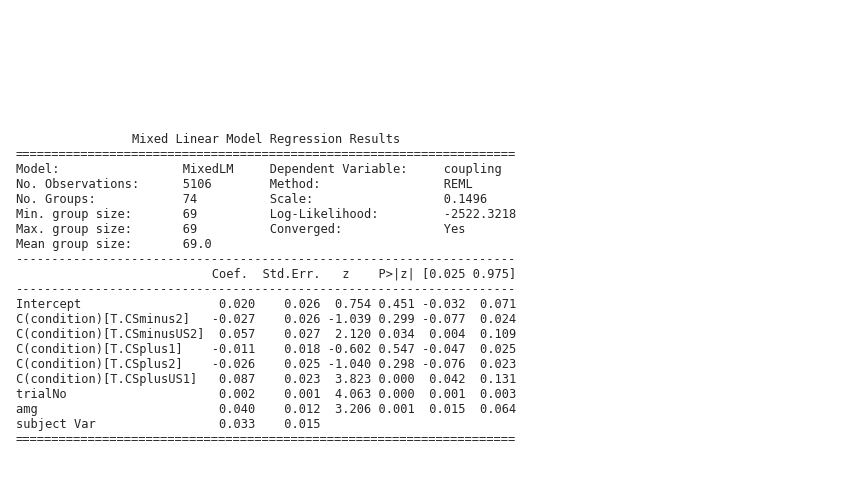

In [24]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [25]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model1.resid, model1.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 53.34790342256296
LM-Test p-value 7.22288845290933e-05
F-Statistic 2.6844722703893225
F-Test p-value 6.853498708767136e-05


In [134]:
# using BAMBI
model = bmb.Model('coupling ~ C(condition)+  amg + (trialNo|subject)', data=dfBoth)

In [135]:
model

Formula: coupling ~ C(condition)+  amg + (trialNo|subject)
Family name: Gaussian
Link: identity
Observations: 5106
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.096, sigma: 1.5258)
    C(condition) ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [2.5422 3.5536 2.8306 2.5422 3.8077])
    amg ~ Normal(mu: 0.0, sigma: 2.449)

  Group-level effects
    1|subject ~ Normal(mu: 0, sigma: HalfNormal(sigma: 1.5258))
    trialNo|subject ~ Normal(mu: 0, sigma: HalfNormal(sigma: 0.0539))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.4292)


In [86]:
conditionsStr = model.common_terms['C(condition)'].levels

In [64]:
fitted = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coupling_sigma, trialNo|subject_offset, trialNo|subject_sigma, 1|subject_offset, 1|subject_sigma, Intercept, amg, C(condition)]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


In [88]:
a = az.summary(fitted, var_names='C(condition)')
a.rename(index={'C(condition)[0]':'CSminus2', 'C(condition)[1]':'CSminusUS2',
                'C(condition)[2]':'CSplus1', 'C(condition)[3]':'CSplus2', 'C(condition)[4]':'CSplusUS1'})

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
CSminus2,0.031,0.020,-0.005,0.067,0.0,0.0,4151.0,2953.0,1.0
CSminusUS2,0.105,0.023,0.062,0.146,0.0,0.0,4593.0,3288.0,1.0
CSplus1,-0.009,0.018,-0.044,0.023,0.0,0.0,4845.0,3686.0,1.0
CSplus2,0.030,0.019,-0.008,0.065,0.0,0.0,4432.0,3078.0,1.0
CSplusUS1,0.078,0.022,0.037,0.120,0.0,0.0,5418.0,3399.0,1.0


CS plus US is shows higher amygdala posterior hippocampus connectivity compared to other conditions

In [23]:
A = np.identity(len(model1.params)) #generate a matrix of the parameters
#A = A[2,:] # take only US
print(A)
model1.f_test(A) #F(1,222)=6.58, p=0.0103
#model1.params

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=14.323215015669547, p=4.071928581057855e-23, df_denom=5.1e+03, df_num=9>

In [28]:
dfBoth.head()

,index,subject,trialNo,condition,coupling,amg,Sub,group,Eprime
0,0,sub-167,1,CSplusUS1,0.761905,-0.665134,sub-167,HC,A
1,1,sub-167,2,CSminus1,-0.238095,-0.060757,sub-167,HC,A
2,2,sub-167,3,CSplus1,0.095238,0.984678,sub-167,HC,A
3,3,sub-167,4,CSplusUS1,0.523810,0.488085,sub-167,HC,A
4,4,sub-167,5,CSminus1,-0.428571,0.053875,sub-167,HC,A


# Interim Summary
- We have establish that coupling between amg-hipp is associated with CS+US
- Now we need to see how SCR is connected

In [89]:
# grab scr and melt it. 
# model scr as dependent and coupling as predictor (including time, condition and interaction)
#scr = pd.read_csv('firstSCRpart.csv')
scr = pd.read_csv('Behavioral/SCR3.csv')
scr = scr[['sub','Condition','Event.Nr','CDA.AmpSum']]
scr['sub'] = scr['sub'].astype('string')
for i in scr.iterrows():
    if len(i[1]['sub'])<=2:
        #print(i[1]['sub'])
        sub = 'sub-0' + str(i[1]['sub'])
    else:
        sub = 'sub-' + str(i[1]['sub'])
    #print(sub)
    scr.at[i[0], 'sub'] = sub
    

In [90]:
scr['sub'].unique()

<StringArray>
['sub-189', 'sub-086', 'sub-205', 'sub-071', 'sub-087', 'sub-204', 'sub-085',
 'sub-024', 'sub-101', 'sub-100',
 ...
 'sub-124', 'sub-021', 'sub-019', 'sub-010', 'sub-158', 'sub-083', 'sub-113',
 'sub-107', 'sub-126', 'sub-152']
Length: 101, dtype: string

In [91]:
scr['trialNo'] = scr['Event.Nr']
scr['scr'] = scr['CDA.AmpSum']
scr.head()

,sub,Condition,Event.Nr,CDA.AmpSum,trialNo,scr
0,sub-189,CSplusUS1,1,0.2852,1,0.2852
1,sub-189,CSminus1,2,0.1033,2,0.1033
2,sub-189,CSplus1,3,0.0783,3,0.0783
3,sub-189,CSplusUS1,4,0.1772,4,0.1772
4,sub-189,CSminus1,5,0.0000,5,0.0000


In [92]:
dfSCR_coupling = pd.merge(dfBoth, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])
dfSCR_coupling.to_csv('dfSCR_coupling.csv', index=False)

In [93]:
len(dfSCR_coupling.subject.unique())

67

In [94]:
glm2 = smf.mixedlm('scr ~ C(condition) + coupling + trialNo+ amg', data=dfSCR_coupling, 
    groups = dfSCR_coupling.subject,
                 missing='drop')
model2 = glm2.fit()
print(model2.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4621        Method:                 REML      
No. Groups:             67          Scale:                  0.3690    
Min. group size:        68          Log-Likelihood:         -4404.2500
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.436    0.065   6.679 0.000  0.308  0.563
C(condition)[T.CSminus2]    0.301    0.042   7.090 0.000  0.218  0.384
C(condition)[T.CSminusUS2]  0.506    0.044  11.474 0.000  0.420  0.593
C(condition)[T.CSplus1]     0.223    0.030   7.337 0.000  0.163  0.282
C(condition)[T.CSplus2]

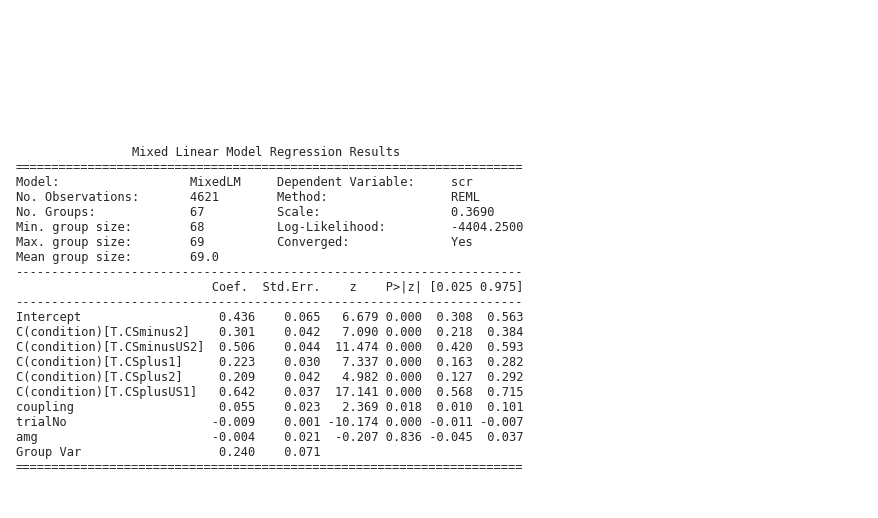

In [95]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model2.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout(pad=0.01)
#plt.savefig('outputSCR_coupling.png', bbox_inches='tight')

In [103]:
# Using BAMBI
# using BAMBI
model2 = bmb.Model('scr ~ condition + coupling + amg +(trialNo|subject)', data=dfSCR_coupling)
fit2 = model2.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [scr_sigma, 1|subject_offset, 1|subject_sigma, Intercept, amg, coupling, condition]


ValueError: Not enough samples to build a trace.

In [133]:
model2

Formula: scr ~ condition + coupling + amg +(1|subject)
Family name: Gaussian
Link: identity
Observations: 4621
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0.385, sigma: 2.9214)
    condition ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [4.8187 6.7311 5.3618 4.8156 7.2124])
    coupling ~ Normal(mu: 0.0, sigma: 4.7189)
    amg ~ Normal(mu: 0.0, sigma: 4.7275)

  Group-level effects
    1|subject ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.9214))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.8131)


In [100]:
az.summary(fit2, var_names='coupling')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coupling,0.051,0.022,0.012,0.095,0.0,0.0,7079.0,2863.0,1.0


Coupling associates with SCR

### Test with vmPFC and other regions
- To make sure the effect is specific to amygdala - hippocampus

In [105]:
# add second stimuli order (B)
def grabCoupling (sub_array, stimList, neuro_array, roi1, roi2, groupCond):
    length = 8
    subjects = []
    trialNo = []
    condition = []
    coupling = []
    amg = [] # assuming roi1 is amygdala
    for sub,v in enumerate(neuro_array):
           
            for i in stimList.iterrows():
                onset = int(i[1].Time /2)
                #print(onset)
                con = i[1][str(groupCond)]
                #print(con)
                subj = sub_array[sub]
                #print(subj)
                trial = i[1].Trial

                #i = int(i)
                a = np.array(v)[onset:onset+length,roi1] 
                b = np.array(v)[onset:onset+length,roi2] 
                coupling.append(scipy.stats.spearmanr(a,b)[0])
                subjects.append(subj)
                condition.append(con)
                trialNo.append(trial)
                if roi1==20: 
                    amg.append(np.mean(a))
                else:
                    print('ROI1 was not defined as amygdala')


    dfCoupl = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
    'condition': condition, 'coupling': coupling, 'amg': amg})

    dfCoupl_first = dfCoupl#[dfCoupl.trialNo<=30] # take just first half
    return dfCoupl_first
        #distUS_b.append(dist)

In [32]:
df_amg_vmpfc1 = grabCoupling(sub_a, stimList, a_array, 20, 42, 'A')
df_amg_vmpfc2 = grabCoupling(sub_a_B, stimList, a_arrayB, 20, 42, 'B')

In [33]:
dfBothVMPFC = pd.concat([df_amg_vmpfc1, df_amg_vmpfc2]).reset_index()


In [34]:
glm3 = smf.mixedlm('coupling ~ C(condition) + trialNo + amg', data=dfBothVMPFC, 
    groups = 'subject', 
                 missing='drop')
model3 = glm3.fit()
print(model3.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1215    
Min. group size:       69          Log-Likelihood:         -1975.4144
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.386    0.020 18.932 0.000  0.346  0.426
C(condition)[T.CSminus2]    0.038    0.023  1.648 0.099 -0.007  0.084
C(condition)[T.CSminusUS2] -0.008    0.024 -0.338 0.735 -0.055  0.039
C(condition)[T.CSplus1]     0.007    0.017  0.413 0.680 -0.026  0.039
C(condition)[T.CSplus2]     0.028   

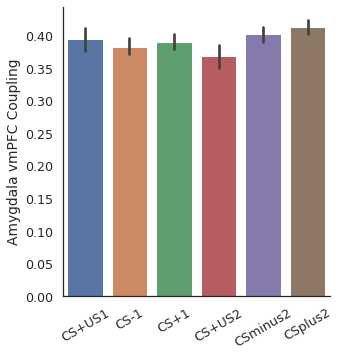

In [35]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='coupling',x='condition', data=dfBothVMPFC, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)

g.set_ylabels("Amygdala vmPFC Coupling")
g.savefig('coupling_different_Conditions_vmPFC.png', dpi=300, bbox_inches='tight')

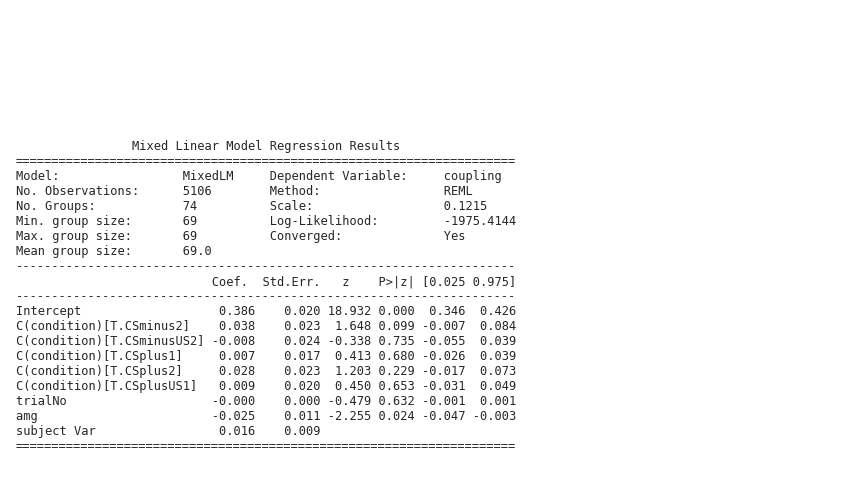

In [36]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model3.summary()), {'fontsize': 12}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout(pad=0.8)
plt.savefig('output_modelVMPFC.png')

# VMPFC - Amygdala
- No effect for condition in the VMPFC - Amygdala coupling

In [33]:
# scr amg-vmpfc
dfSCR_couplingVMPFC = pd.merge(dfBothVMPFC, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])
dfSCR_couplingVMPFC.to_csv('vmPFCcoupling.csv', index=False)

In [34]:
glm4 = smf.mixedlm('scr ~ C(condition)+coupling + trialNo + amg', data=dfSCR_couplingVMPFC, 
    groups = 'subject', 
                 missing='drop')
model4 = glm4.fit()
print(model4.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4621        Method:                 REML      
No. Groups:             67          Scale:                  0.3695    
Min. group size:        68          Log-Likelihood:         -4406.7557
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.430    0.066   6.539 0.000  0.301  0.559
C(condition)[T.CSminus2]    0.298    0.042   7.015 0.000  0.215  0.381
C(condition)[T.CSminusUS2]  0.508    0.044  11.523 0.000  0.422  0.595
C(condition)[T.CSplus1]     0.221    0.030   7.294 0.000  0.162  0.281
C(condition)[T.CSplus2]

## Amygdala anterior hippocampus

In [37]:
df_amg_hippAnt = grabCoupling(sub_a, stimList, a_array, 20, 167, 'A')
df_amg_hippAnt2 = grabCoupling(sub_a_B, stimList, a_arrayB, 20, 167, 'B')

dfBothHippAnt = pd.concat([df_amg_hippAnt, df_amg_hippAnt2]).reset_index()


In [41]:
glm5 = smf.mixedlm('coupling ~ C(condition) + trialNo + amg', data=dfBothHippAnt, 
    groups = 'subject', 
                 missing='drop')
model5 = glm5.fit()
print(model5.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1402    
Min. group size:       69          Log-Likelihood:         -2332.7374
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.207    0.021  9.985 0.000  0.166  0.247
C(condition)[T.CSminus2]    0.043    0.025  1.730 0.084 -0.006  0.092
C(condition)[T.CSminusUS2]  0.067    0.026  2.596 0.009  0.016  0.118
C(condition)[T.CSplus1]    -0.004    0.018 -0.232 0.817 -0.039  0.031
C(condition)[T.CSplus2]     0.051   

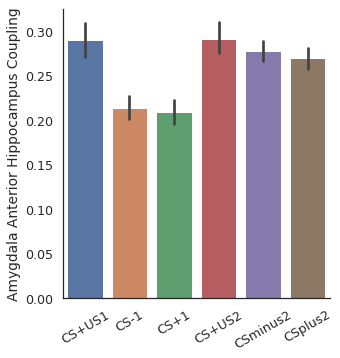

In [39]:
sns.set(font_scale = 1.15)
sns.set_style("white")
g = sns.catplot(y='coupling',x='condition', data=dfBothHippAnt, kind='bar', ci=68)
g.set_xlabels("")
g.set_xticklabels(
    labels=["CS+US1", "CS-1", "CS+1", "CS+US2", "CSminus2", "CSplus2"], rotation=30)

g.set_ylabels("Amygdala Anterior Hippocampus Coupling")
g.savefig('coupling_different_Conditions_AntHipp.png', dpi=300, bbox_inches='tight')

In [40]:
# scr amg-hipp anterior
dfSCR_couplingHippAnt = pd.merge(dfBothHippAnt, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])
dfSCR_couplingHippAnt.to_csv('HippAntcoupling.csv', index=False)

In [42]:
glm6 = smf.mixedlm('scr ~ C(condition)+coupling + trialNo + amg', data=dfSCR_couplingHippAnt, 
    groups = 'subject', 
                 missing='drop')
model6 = glm6.fit()
print(model6.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4621        Method:                 REML      
No. Groups:             67          Scale:                  0.3694    
Min. group size:        68          Log-Likelihood:         -4406.3165
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.431    0.065   6.600 0.000  0.303  0.558
C(condition)[T.CSminus2]    0.298    0.042   7.004 0.000  0.214  0.381
C(condition)[T.CSminusUS2]  0.506    0.044  11.463 0.000  0.420  0.593
C(condition)[T.CSplus1]     0.222    0.030   7.305 0.000  0.162  0.281
C(condition)[T.CSplus2]

Coupling of Amygdala and anterior hippocampus doen't predict SCR

### Control region
- Using Supramarginal Gyrus (Left Hemisphere)

In [120]:
df_amg_SG = grabCoupling(sub_a, stimList, a_array, 20, 21, 'A')
df_amg_SG2 = grabCoupling(sub_a_B, stimList, a_arrayB, 20, 21, 'B')

df_amg_SGAll = pd.concat([df_amg_SG, df_amg_SG2]).reset_index()


In [121]:
glm7 = smf.mixedlm('coupling ~ C(condition) + trialNo + amg', data=df_amg_SGAll, 
    groups = 'subject', 
                 missing='drop')
model7 = glm7.fit()
print(model7.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     coupling  
No. Observations:      5106        Method:                 REML      
No. Groups:            74          Scale:                  0.1552    
Min. group size:       69          Log-Likelihood:         -2569.1401
Max. group size:       69          Converged:              Yes       
Mean group size:       69.0                                          
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   0.050    0.019  2.655 0.008  0.013  0.087
C(condition)[T.CSminus2]   -0.023    0.026 -0.868 0.385 -0.074  0.029
C(condition)[T.CSminusUS2] -0.030    0.027 -1.086 0.278 -0.083  0.024
C(condition)[T.CSplus1]     0.008    0.019  0.419 0.675 -0.029  0.045
C(condition)[T.CSplus2]    -0.004   

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [122]:
dfSCR_couplingSG = pd.merge(df_amg_SGAll, scr, left_on=['subject','trialNo'], right_on=['sub','trialNo'])

In [123]:
glm8 = smf.mixedlm('scr ~ C(condition)+coupling + trialNo + amg', data=dfSCR_couplingSG, 
    groups = 'subject', 
                 missing='drop')
model8 = glm8.fit()
print(model8.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     scr       
No. Observations:       4621        Method:                 REML      
No. Groups:             67          Scale:                  0.3694    
Min. group size:        68          Log-Likelihood:         -4406.8536
Max. group size:        69          Converged:              Yes       
Mean group size:        69.0                                          
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   0.436    0.065   6.703 0.000  0.308  0.563
C(condition)[T.CSminus2]    0.299    0.042   7.039 0.000  0.216  0.382
C(condition)[T.CSminusUS2]  0.509    0.044  11.530 0.000  0.422  0.595
C(condition)[T.CSplus1]     0.221    0.030   7.295 0.000  0.162  0.281
C(condition)[T.CSplus2]

## Summary:
- Using spearman (can be pearson) correlation with 8 TR after event (i.e. maximum difference between events):
    1. Amygdala - Hippocampus highly coupled when CS+US compared to other conditions
    2. Amygdala - vmPFC not coupled
    3. Using supramarginal gyrus as control region- no difference between the conditions in coupling
- These results suggest there's a possibility the amygdala-hippocampus are biomarker of aversive learning.

# Visualization
- Graph average activation of Amygdala and Hippocampus in each condition

In [35]:
cspUS = stimList.Time[stimList['A']=='CSplusUS1'].values
csp = stimList.Time[stimList['A']=='CSplus1'].values
csm  = stimList.Time[stimList['A']=='CSminus1'].values

In [124]:
def grabArray (sub_array, stimList, neuro_array, roi1, roi2, groupCond):
    length = 8
    subjects = []
    trialNo = []
    condition = []
    a_all = []
    b_all = []
    
    for sub,v in enumerate(neuro_array):
           
            for i in stimList.iterrows():
                onset = int(i[1].Time /2)
                #print(onset)
                con = i[1][str(groupCond)]
                #print(con)
                subj = sub_array[sub]
                #print(subj)
                trial = i[1].Trial

                #i = int(i)
                a = np.array(v)[onset:onset+length,roi1] 
                b = np.array(v)[onset:onset+length,roi2] 
                a_all.append(a)
                b_all.append(b)
                subjects.append(subj)
                condition.append(con)
                trialNo.append(trial)
               

    dfCoupl = pd.DataFrame({'subject': subjects, 'trialNo': trialNo,
    'condition': condition, 'amg': a_all, 'hipp': b_all})

#     dfCoupl_first = dfCoupl#[dfCoupl.trialNo<=30] # take just first half
    return dfCoupl

In [125]:
test = grabArray(sub_a, stimList, a_array, 20, 94, 'A')
test

,subject,trialNo,condition,amg,hipp
0,sub-167,1,CSplusUS1,"[0.00046230748, 0.27454814, -1.2699937, 1.0822...","[-0.0016496804, -1.7879968, -0.94720984, 0.929..."
1,sub-167,2,CSminus1,"[-1.3521638, -0.23993047, -0.29676592, 0.99795...","[1.7116405, -0.5254319, 0.11320465, 1.6757425,..."
2,sub-167,3,CSplus1,"[-0.28399307, 1.6763673, 1.8595761, 1.5347852,...","[0.9950254, 1.948658, 0.8048139, 3.1048195, -0..."
3,sub-167,4,CSplusUS1,"[-0.31528744, 1.2172725, 1.6230801, 0.50957984...","[0.4531476, 1.9719242, 1.3042775, 1.4319314, 0..."
4,sub-167,5,CSminus1,"[0.28035787, -0.24912466, 0.47078893, 0.851827...","[-0.41890657, 0.94972754, -1.4711101, -0.36972..."
...,...,...,...,...,...
3376,sub-055,65,CSminus2,"[-0.11345203, 1.2493029, -0.3585488, 1.1582966...","[-2.1273699, 0.47745287, 0.23939869, 0.2216718..."
3377,sub-055,66,CSplus2,"[-0.16601121, -0.1634242, -0.1799828, -0.68455...","[-0.14965864, 0.7698146, -0.2962276, -0.767999..."
3378,sub-055,67,CSminus2,"[-1.3669517, -0.105668135, -0.8974713, 1.15424...","[-2.7618082, -0.6474308, -0.24121894, 0.602381..."
3379,sub-055,68,CSplus2,"[-0.9487853, 1.855578, -2.2637777, 0.037187856...","[-0.079374015, 2.0634341, 0.6318353, -0.268165..."


In [126]:
testVMPFC = grabArray(sub_a, stimList, a_array, 20, 42, 'A')

In [127]:
testSG = grabArray(sub_a, stimList, a_array, 20, 21, 'A')

In [128]:
def plotSubfigs(subfigs,subNum, depVar,title, test,l,legend=False):
    # gets subfig and the index number of it to plot the same as above
    sns.set_style("ticks") # set style
    y = str(depVar)
    #dfPlot = df
    axsLeft = subfigs[subNum].subplots(1,1)#, gridspec_kw={'width_ratios': [1, .2],'wspace':.01})
    ax1 = axsLeft
    testCSm = test[test.condition==y].reset_index()
    am = testCSm.amg
    hipp = testCSm.hipp
    trials = len(stimList[stimList.A==y])
    am1 = am.values.reshape((trials,49)) # reshape to number of trials and subjects
    hipp1 = hipp.values.reshape((trials,49))
    am2 = np.mean(am1[:,:], axis=0)
    # try to reshape to 49,8
    am3 = np.zeros((49,8))
    for i in np.arange(49):
        am3[i,:] = am2[i]
    am3 = pd.DataFrame(am3)
    am3 = pd.melt(am3)
    # hippocampus
    hipp2 = np.mean(hipp1[:,:], axis=0)
    hipp3 = np.zeros((49,8))
    for i in np.arange(49):
        hipp3[i,:] = hipp2[i]

    hipp3 = pd.DataFrame(hipp3)
    hipp3 = pd.melt(hipp3)

    # plot
    sns.lineplot(x='variable', y='value', data=am3, ci=68, label='Amygdala')
    sns.lineplot(x='variable', y='value', data=hipp3, ci=68, label=l)
    plt.title(title)
    if legend:
        plt.legend()
    else:
        plt.legend().remove()
    
    if subNum==0:
        plt.xlabel('TRs')
        plt.ylabel('Region Activation')
    else:
        plt.xlabel('TRs')
        plt.ylabel('')
        
        
    #ax1.title.set_style(font="large")

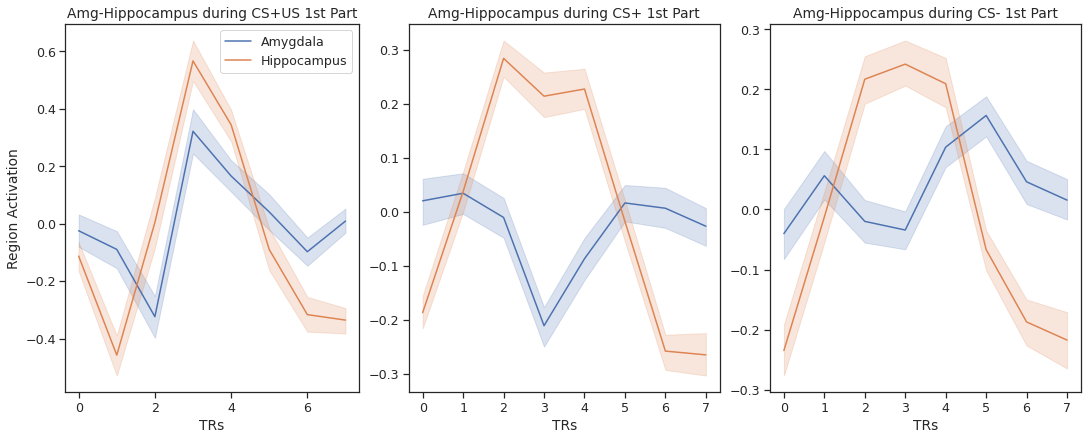

In [129]:
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)
plotSubfigs(subfigs, 0, 'CSplusUS1', "Amg-Hippocampus during CS+US 1st Part",test,"Hippocampus", legend=True)
plotSubfigs(subfigs, 1, 'CSplus1', "Amg-Hippocampus during CS+ 1st Part", test, "Hippocampus")
plotSubfigs(subfigs, 2, 'CSminus1', "Amg-Hippocampus during CS- 1st Part", test, "Hippocampus")
fig.savefig('amygdala_hippocampusCoupling_Timeline.png', dpi=300, bbox_inches='tight')

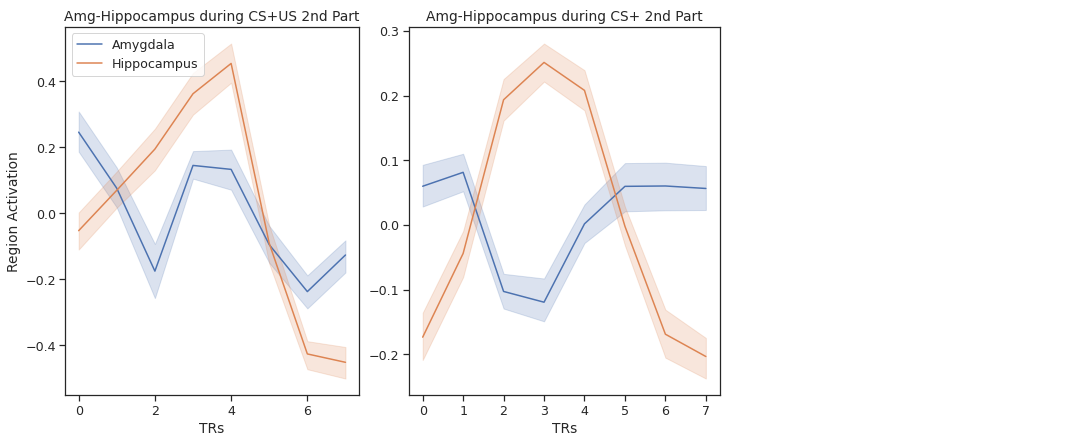

In [130]:
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)
plotSubfigs(subfigs, 0, 'CSminusUS2', "Amg-Hippocampus during CS+US 2nd Part",test,"Hippocampus", legend=True)
plotSubfigs(subfigs, 1, 'CSplus2', "Amg-Hippocampus during CS+ 2nd Part",test, "Hippocampus")
#plotSubfigs(subfigs, 2, 'CSminus2', "Amg-Hippocampus during CS- 2nd Part")

In [276]:
# need to remove arrays with only 4 TRs
y= 'CSminus2'
testCSm = test[test.condition==y].reset_index()
am = testCSm.amg
hipp = testCSm.hipp
trials = len(stimList[stimList.A==y])
am1 = am.values.reshape((trials,49)) # reshape to number of trials and subjects

# VMPFC - amygdala

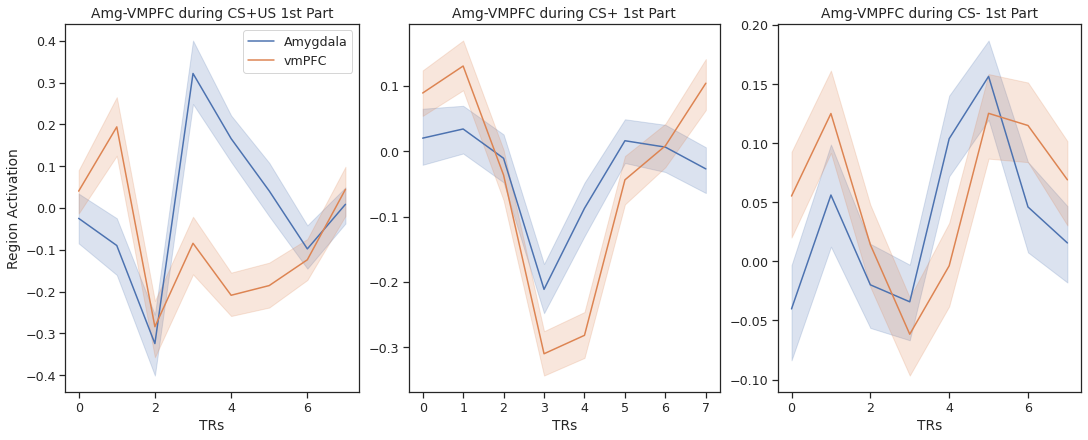

In [131]:
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)
plotSubfigs(subfigs, 0, 'CSplusUS1', "Amg-VMPFC during CS+US 1st Part",testVMPFC,"vmPFC", legend=True)
plotSubfigs(subfigs, 1, 'CSplus1', "Amg-VMPFC during CS+ 1st Part",testVMPFC, "vmPFC")
plotSubfigs(subfigs, 2, 'CSminus1', "Amg-VMPFC during CS- 1st Part", testVMPFC, "vmPFC")
fig.savefig('amygdala_vmPFCCoupling_Timeline.png', dpi=300, bbox_inches='tight')

## Amygdala - Supramarginal Gyrus Left

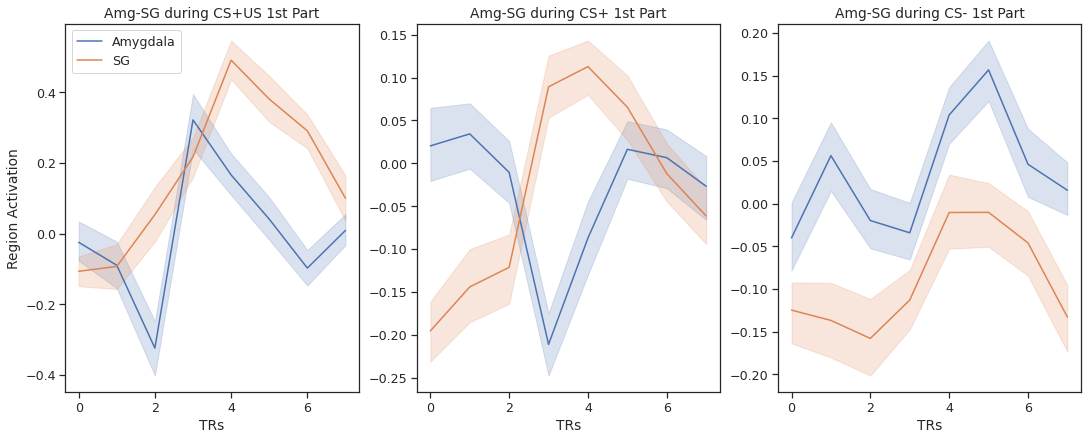

In [132]:
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 3, wspace=0.01)
plotSubfigs(subfigs, 0, 'CSplusUS1', "Amg-SG during CS+US 1st Part",testSG,"SG", legend=True)
plotSubfigs(subfigs, 1, 'CSplus1', "Amg-SG during CS+ 1st Part",testSG, "SG")
plotSubfigs(subfigs, 2, 'CSminus1', "Amg-SG during CS- 1st Part", testSG, "SG")
#fig.savefig('amygdala_vmPFCCoupling_Timeline.png', dpi=300, bbox_inches='tight')

# Ifat
- Grab part of the amygdala-hippocampus timeseries and mark the conditions

In [20]:
# code to run the timeseries
# now take a few CSplusUS
stimList#.Time#[stimList.A=='CSplusUS1']
us1 = stimList.Time[stimList.A=="CSplusUS1"]
csminus = stimList.Time[stimList.A=="CSminus1"]
us1 = np.array(us1 /2) # turn it to TR
csminus = np.array(csminus/2)
csplus = stimList.Time[stimList.A=="CSplus1"]
csplus = np.array(csplus /2) # turn it to TR
# for the B condition
us1_b = stimList.Time[stimList.B=="CSplusUS1"]
csminus_b = stimList.Time[stimList.B=="CSminus1"]
csplus_b = stimList.Time[stimList.B=="CSplus1"]
us1_b = np.array(us1_b /2) # turn it to TR
csminus_b = np.array(csminus_b/2)
csplus_b = np.array(csplus_b / 2)

In [21]:
# plot with CSplusUS1 as lines
offset = 5 # set offset
d = pd.DataFrame(np.array(a_array)[:,5:150,20]) # amygdala
e = pd.DataFrame(np.array(a_array)[:,5:150,94]) # hippocampus
f = pd.DataFrame(np.array(a_array)[:,5:150,42]) # vmPFC
d = pd.melt(d)
e = pd.melt(e)
f = pd.melt(f)
%matplotlib inline
#%matplotlib widget

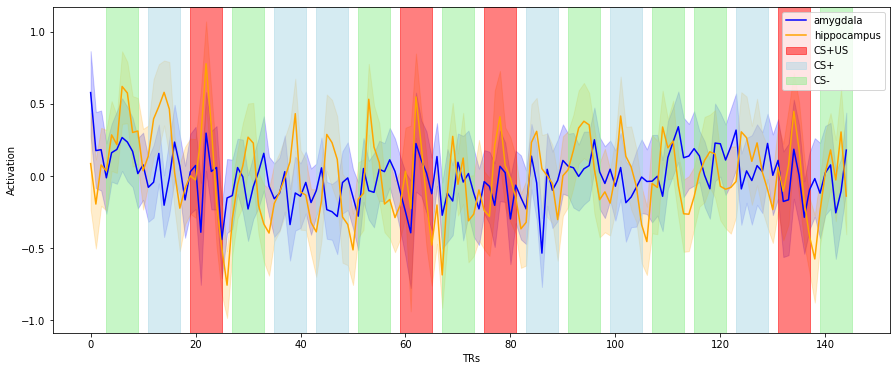

In [22]:
plt.figure(figsize=[15,6])
sns.lineplot(x='variable',y= 'value', data=d, color = 'blue', label='amygdala')
sns.lineplot(x='variable',y= 'value', data=e, color = 'orange', label= 'hippocampus')
#sns.lineplot('variable','value', data=f, color='green')

for n,i in enumerate(us1[1:5]):
    plt.axvspan(xmin=i-offset,xmax=i+6-offset, ymin=0, ymax=1, alpha=.5, color='red', label =  "_"*n + 'CS+US')
for n,b in enumerate(csplus[0:6]):
    plt.axvspan(xmin=b-offset,xmax=b+6-offset, ymin=0, ymax=1, alpha=.5, color="lightblue", label= "_"*n + 'CS+')
for n,c in enumerate(csminus[0:8]):
    plt.axvspan(xmin=c-offset,xmax=c+6-offset, ymin=0, ymax=1, alpha=.5, color="lightgreen", label= "_"*n + 'CS-')
plt.legend()
plt.xlabel("TRs")
plt.ylabel("Activation")
plt.savefig('timeSeries_Amg_Hipp_150TRs_2.png', dpi=300, bbox_inches='tight')